In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
covid=pd.read_csv("time_series_covid_19_confirmed.csv")

In [3]:
covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,6580,6793,7022,7164,7486,7903,8085,8210,8275,8501


In [4]:
covid.drop(['Lat','Long'],axis=1,inplace=True)

In [5]:
covid_countrywise=covid.groupby("Country/Region").sum()
covid_countrywise

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
Albania,0,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
Algeria,0,0,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
Andorra,0,0,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
Angola,0,0,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,...,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841


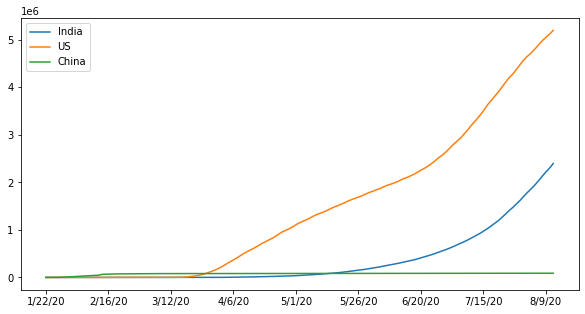

In [6]:
plt.figure(figsize=(10,5))
covid_countrywise.loc['India'].plot()
covid_countrywise.loc['US'].plot()
covid_countrywise.loc['China'].plot()
plt.legend();

# SECTION 2:

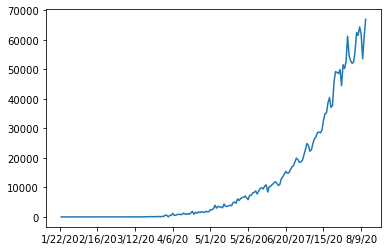

In [7]:
#infection rate (cases per unit time)
covid_countrywise.loc['India'].diff().plot();

In [8]:
covid_countrywise.loc['India'].diff().max()

66999.0

In [9]:
max_infection_rate=[]
for country in covid_countrywise.index:
    a=covid_countrywise.loc[country].diff().max()
    max_infection_rate.append(a)

In [10]:
covid_countrywise['max_infection_rate']=max_infection_rate

In [11]:
covid_countrywise

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,141.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,32504,33055,33626,34155,34693,35160,35712,36204,36699,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,939,939,944,955,955,955,963,963,977,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,1344,1395,1483,1538,1572,1672,1679,1735,1762,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,12770,13065,13398,13722,13928,14208,14510,14875,15184,501.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1760,1763,1768,1796,1797,1804,1832,1831,1841,116.0


In [12]:
corona_data=pd.DataFrame(covid_countrywise['max_infection_rate'])

In [13]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,141.0
Algeria,675.0
Andorra,79.0
Angola,100.0


# SECTION 3:

In [14]:
happiness_report=pd.read_csv("worldwide_happiness_report.csv")

In [15]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [16]:
happiness_report.drop(['Overall rank','Score','Generosity','Perceptions of corruption'],axis=1,inplace=True)

In [17]:
happiness_report.set_index('Country or region',inplace=True)

In [18]:
happiness_report

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


In [19]:
data=corona_data.join(happiness_report,how="inner")

In [20]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,141.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,7663.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283


In [21]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.100475,0.067720,0.088250,0.088359
GDP per capita,0.100475,1.000000,0.757521,0.859431,0.394799
Social support,0.067720,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.088250,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.088359,0.394799,0.456317,0.423146,1.000000


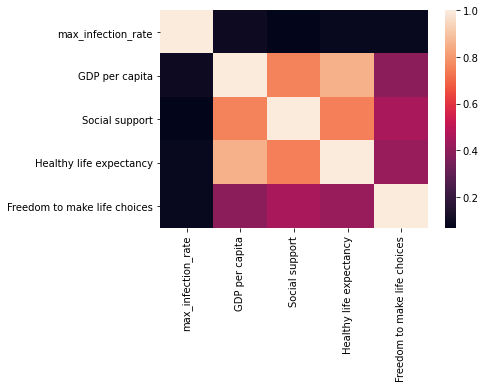

In [22]:
sns.heatmap(data.corr());

# SECTION 5

In [23]:
corona2=pd.read_csv("time_series_covid_19_confirmed.csv")

In [24]:
corona2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [25]:
corona_countrywise=corona2.groupby('Country/Region').mean()
corona_countrywise.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36747.0,36782.0,36829.0,36896.0,37015.0,37054.0,37054.0,37162.0,37269.0,37345.0
Albania,41.15330,20.168300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5620.0,5750.0,5889.0,6016.0,6151.0,6275.0,6411.0,6536.0,6676.0,6817.0
Algeria,28.03390,1.659600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31972.0,32504.0,33055.0,33626.0,34155.0,34693.0,35160.0,35712.0,36204.0,36699.0
Andorra,42.50630,1.521800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,937.0,939.0,939.0,944.0,955.0,955.0,955.0,963.0,963.0,977.0
Angola,-11.20270,17.873900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1280.0,1344.0,1395.0,1483.0,1538.0,1572.0,1672.0,1679.0,1735.0,1762.0


In [26]:
corona_data=pd.DataFrame(corona_countrywise['Lat'])
corona_data['Long']=corona_countrywise['Long']
corona_data

,Lat,Long
Country/Region,,
Afghanistan,33.939110,67.709953
Albania,41.153300,20.168300
Algeria,28.033900,1.659600
Andorra,42.506300,1.521800
Angola,-11.202700,17.873900
...,...,...
West Bank and Gaza,31.952200,35.233200
Western Sahara,24.215500,-12.885800
Yemen,15.552727,48.516388


In [27]:
data2=corona_data.join(data,how='inner')

In [28]:
data2.head()

,Lat,Long,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,33.93911,67.709953,915.0,0.350,0.517,0.361,0.000
Albania,41.15330,20.168300,141.0,0.947,0.848,0.874,0.383
Algeria,28.03390,1.659600,675.0,1.002,1.160,0.785,0.086
Argentina,-38.41610,-63.616700,7663.0,1.092,1.432,0.881,0.471
Armenia,40.06910,45.038200,771.0,0.850,1.055,0.815,0.283


In [45]:
world=world=folium.Map(tiles='cartodbpositron',zoom_start=4,max_zoom=4,min_zoom=0,height=500)

In [46]:
world

In [47]:
b=len(data2[data2['max_infection_rate']>0].index)

In [49]:
for i in range(b):
    folium.Circle(location=[data2.iloc[i]['Lat'],
                           data2.iloc[i]['Long']],
                  tooltip="<h4>"+data2.iloc[i].name+"</h4>" +
                "<li>"+str(data2.iloc[i]['max_infection_rate'])+'</li'
                '<li>'+str(data2.iloc[i]['GDP per capita'])+'</li>'
                '<li>'+str(data2.iloc[i]['Social support'])+'</li>'
                '<li>'+str(data2.iloc[i]['Healthy life expectancy'])+'</li>'
                '<li>'+str(data2.iloc[i]['Freedom to make life choices'])+'</li>'
                 ,radius=int(data2.iloc[i]['max_infection_rate'])*10).add_to(world)
world

# SECTION 5:

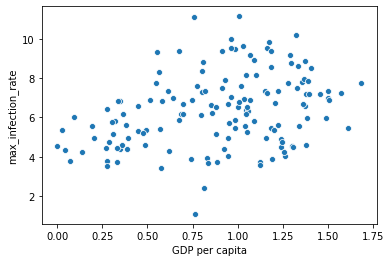

In [35]:
x=data2["GDP per capita"]
y=data2['max_infection_rate']
sns.scatterplot(x,np.log(y));

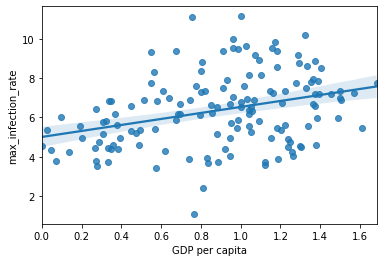

In [36]:
sns.regplot(x,np.log(y));

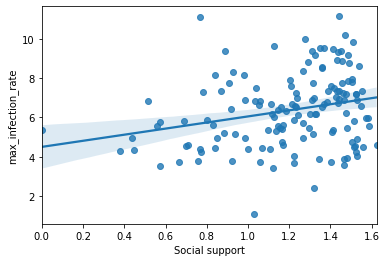

In [52]:
r1=data2['Social support']
sns.regplot(r1,np.log(y));

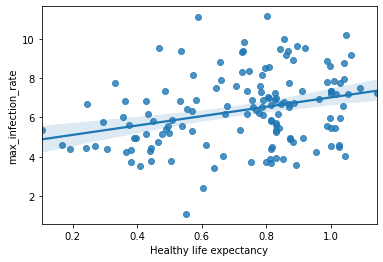

In [51]:
r2=data2['Healthy life expectancy']
sns.regplot(r2,np.log(y));

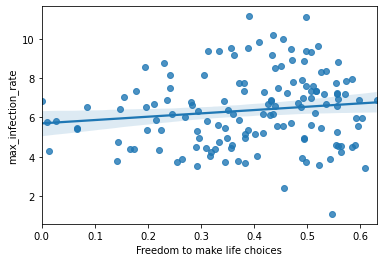

In [50]:
r3=data2['Freedom to make life choices']
sns.regplot(r3,np.log(y));